In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from perovskiteml.data import PerovskiteDatabase
from perovskiteml.data.base import BaseDataset

In [2]:
def plot_barh(
    val_counts: pd.Series,
    title: str = "",
    ylabel: str = "feature",
    xscale: str = "log",
    xmargin: float = 0.2,
    max_display: int = 20,  # How many features to show
):
    other_counts = val_counts[max_display:].sum()
    val_counts = val_counts[:max_display].copy()
    val_counts["other"] = other_counts
    
    fig, ax = plt.subplots()
    hbars = ax.barh(val_counts.index.astype(str), val_counts.values, align="center")
    ax.bar_label(hbars)
    ax.invert_yaxis()
    ax.margins(x=xmargin)
    ax.set_xscale(xscale)
    ax.set_title(title)
    ax.set_xlabel("counts")
    ax.set_ylabel(ylabel)
    fig.tight_layout()
    return (fig, ax)

In [3]:
database_path = "../data/clean"
database = PerovskiteDatabase.load(database_path)
database.data

,Ref_ID,Ref_ID_temp,Ref_name_of_person_entering_the_data,Ref_data_entered_by_author,Ref_DOI_number,Ref_lead_author,Ref_publication_date,Ref_journal,Ref_part_of_initial_dataset,Ref_original_filename_data_upload,...,Outdoor_PCE_Tse80,Outdoor_PCE_after_1000_h,Outdoor_power_generated,Outdoor_link_raw_data_for_outdoor_trace,Outdoor_detaild_weather_data_available,Outdoor_link_detailed_weather_data,Outdoor_spectral_data_available,Outdoor_link_spectral_data,Outdoor_irradiance_measured,Outdoor_link_irradiance_data
0,1,1,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
1,2,2,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
2,3,3,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
3,4,4,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
4,5,5,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43247,43623,11,Daniele T. Cuzzupè,True,10.1002/solr.202300770,Cuzzupè et al.,2023-10-11,Solar RRL,False,2023-12-01 _v1.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
43248,43624,12,Daniele T. Cuzzupè,True,10.1002/solr.202300770,Cuzzupè et al.,2023-10-11,Solar RRL,False,2023-12-01 _v1.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
43249,43625,13,Daniele T. Cuzzupè,True,10.1002/solr.202300770,Cuzzupè et al.,2023-10-11,Solar RRL,False,2023-12-01 _v1.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
43250,10974,10974,Gerrit Boschloo,False,10.1039/c8se00450a,Baranwal et al.,2018-10-23,Sustainable Energy & Fuels,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN


In [4]:
processed = database.data.loc[:, [
    "Perovskite_dimension_3D",
    "Perovskite_composition_perovskite_ABC3_structure",
    "Perovskite_composition_long_form",
    "Perovskite_composition_a_ions",
    "Perovskite_composition_a_ions_coefficients",
    "Perovskite_composition_b_ions",
    "Perovskite_composition_b_ions_coefficients",
    "Perovskite_composition_c_ions",
    "Perovskite_composition_c_ions_coefficients",
    "Perovskite_band_gap"
]]
processed

,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_long_form,Perovskite_composition_a_ions,Perovskite_composition_a_ions_coefficients,Perovskite_composition_b_ions,Perovskite_composition_b_ions_coefficients,Perovskite_composition_c_ions,Perovskite_composition_c_ions_coefficients,Perovskite_band_gap
0,True,True,CsSnI3,Cs,1,Sn,1,I,3,1.27
1,True,True,CsSnBr0.3I2.7,Cs,1,Sn,1,Br; I,0.3; 2.7,NaN
2,True,True,CsSnBr1.5I1.5,Cs,1,Sn,1,Br; I,1.5; 1.5,NaN
3,True,True,CsSnBr2.7I0.3,Cs,1,Sn,1,Br; I,2.7; 0.3,NaN
4,True,True,CsSnBr3,Cs,1,Sn,1,Br,3,1.75
...,...,...,...,...,...,...,...,...,...,...
43247,False,True,(PEA)0.08FA0.92SnI3,(PEA); FA,0.08; 0.92,Sn,1,I,3,1.42
43248,False,True,(PEA)0.08FA0.92SnI3,(PEA); FA,0.08; 0.92,Sn,1,I,3,1.42
43249,False,True,(PEA)0.08FA0.92SnI3,(PEA); FA,0.08; 0.92,Sn,1,I,3,1.42
43250,True,True,MAPbI3,MA,1,Pb,1,I,3,1.6


In [5]:
processed.dropna(subset=["Perovskite_composition_long_form"], inplace=True)
processed

,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_long_form,Perovskite_composition_a_ions,Perovskite_composition_a_ions_coefficients,Perovskite_composition_b_ions,Perovskite_composition_b_ions_coefficients,Perovskite_composition_c_ions,Perovskite_composition_c_ions_coefficients,Perovskite_band_gap
0,True,True,CsSnI3,Cs,1,Sn,1,I,3,1.27
1,True,True,CsSnBr0.3I2.7,Cs,1,Sn,1,Br; I,0.3; 2.7,NaN
2,True,True,CsSnBr1.5I1.5,Cs,1,Sn,1,Br; I,1.5; 1.5,NaN
3,True,True,CsSnBr2.7I0.3,Cs,1,Sn,1,Br; I,2.7; 0.3,NaN
4,True,True,CsSnBr3,Cs,1,Sn,1,Br,3,1.75
...,...,...,...,...,...,...,...,...,...,...
43247,False,True,(PEA)0.08FA0.92SnI3,(PEA); FA,0.08; 0.92,Sn,1,I,3,1.42
43248,False,True,(PEA)0.08FA0.92SnI3,(PEA); FA,0.08; 0.92,Sn,1,I,3,1.42
43249,False,True,(PEA)0.08FA0.92SnI3,(PEA); FA,0.08; 0.92,Sn,1,I,3,1.42
43250,True,True,MAPbI3,MA,1,Pb,1,I,3,1.6


In [6]:
processed.dropna(subset=["Perovskite_composition_perovskite_ABC3_structure"], inplace=True)
processed = processed[processed["Perovskite_dimension_3D"]]
processed = processed[processed["Perovskite_composition_perovskite_ABC3_structure"]]
processed

,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_long_form,Perovskite_composition_a_ions,Perovskite_composition_a_ions_coefficients,Perovskite_composition_b_ions,Perovskite_composition_b_ions_coefficients,Perovskite_composition_c_ions,Perovskite_composition_c_ions_coefficients,Perovskite_band_gap
0,True,True,CsSnI3,Cs,1,Sn,1,I,3,1.27
1,True,True,CsSnBr0.3I2.7,Cs,1,Sn,1,Br; I,0.3; 2.7,NaN
2,True,True,CsSnBr1.5I1.5,Cs,1,Sn,1,Br; I,1.5; 1.5,NaN
3,True,True,CsSnBr2.7I0.3,Cs,1,Sn,1,Br; I,2.7; 0.3,NaN
4,True,True,CsSnBr3,Cs,1,Sn,1,Br,3,1.75
...,...,...,...,...,...,...,...,...,...,...
43234,True,True,Cs0.18FA0.82PbBr0.24I2.82,Cs; FA,0.18; 0.82,Pb,1,Br; I,0.24; 2.82,1.55
43235,True,True,Cs0.18FA0.82PbBr0.24I2.82,Cs; FA,0.18; 0.82,Pb,1,Br; I,0.24; 2.82,1.55
43236,True,True,Cs0.18FA0.82PbBr0.24I2.82,Cs; FA,0.18; 0.82,Pb,1,Br; I,0.24; 2.82,1.55
43250,True,True,MAPbI3,MA,1,Pb,1,I,3,1.6


In [7]:
multi_layer_count = processed["Perovskite_composition_long_form"].str.contains(r'\|').sum()
print(f"Number of entries with multiple perovskite layers: {multi_layer_count}")

Number of entries with multiple perovskite layers: 233


In [8]:
processed["Perovskite_composition_long_form"] = processed["Perovskite_composition_long_form"].astype(str)

multi_layer_mask = processed["Perovskite_composition_long_form"].str.contains(r'\|')
processed = processed[~multi_layer_mask]
processed

,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_long_form,Perovskite_composition_a_ions,Perovskite_composition_a_ions_coefficients,Perovskite_composition_b_ions,Perovskite_composition_b_ions_coefficients,Perovskite_composition_c_ions,Perovskite_composition_c_ions_coefficients,Perovskite_band_gap
0,True,True,CsSnI3,Cs,1,Sn,1,I,3,1.27
1,True,True,CsSnBr0.3I2.7,Cs,1,Sn,1,Br; I,0.3; 2.7,NaN
2,True,True,CsSnBr1.5I1.5,Cs,1,Sn,1,Br; I,1.5; 1.5,NaN
3,True,True,CsSnBr2.7I0.3,Cs,1,Sn,1,Br; I,2.7; 0.3,NaN
4,True,True,CsSnBr3,Cs,1,Sn,1,Br,3,1.75
...,...,...,...,...,...,...,...,...,...,...
43234,True,True,Cs0.18FA0.82PbBr0.24I2.82,Cs; FA,0.18; 0.82,Pb,1,Br; I,0.24; 2.82,1.55
43235,True,True,Cs0.18FA0.82PbBr0.24I2.82,Cs; FA,0.18; 0.82,Pb,1,Br; I,0.24; 2.82,1.55
43236,True,True,Cs0.18FA0.82PbBr0.24I2.82,Cs; FA,0.18; 0.82,Pb,1,Br; I,0.24; 2.82,1.55
43250,True,True,MAPbI3,MA,1,Pb,1,I,3,1.6


In [9]:

comp_data: pd.DataFrame = processed.loc[:,[
    "Perovskite_composition_long_form",
    "Perovskite_composition_a_ions",
    "Perovskite_composition_a_ions_coefficients",
    "Perovskite_composition_b_ions",
    "Perovskite_composition_b_ions_coefficients",
    "Perovskite_composition_c_ions",
    "Perovskite_composition_c_ions_coefficients",
    "Perovskite_band_gap"
]].copy()
comp_data.rename(columns={
    'Perovskite_composition_long_form': 'perovskite',
    "Perovskite_composition_a_ions": "a_ions",
    "Perovskite_composition_a_ions_coefficients": "a_coeff",
    "Perovskite_composition_b_ions": "b_ions",
    "Perovskite_composition_b_ions_coefficients": "b_coeff",
    "Perovskite_composition_c_ions": "c_ions",
    "Perovskite_composition_c_ions_coefficients": "c_coeff",
    "Perovskite_band_gap": "E_g"
}, inplace=True)
comp_data.dropna(inplace=True)
comp_data = comp_data[~comp_data["a_ions"].str.contains("nan")]
comp_data.reset_index(inplace=True, drop=True)
comp_data["E_g"] = pd.to_numeric(
    comp_data["E_g"],
    errors='coerce'
)
comp_data

,perovskite,a_ions,a_coeff,b_ions,b_coeff,c_ions,c_coeff,E_g
0,CsSnI3,Cs,1,Sn,1,I,3,1.27
1,CsSnBr3,Cs,1,Sn,1,Br,3,1.75
2,CsSnI3,Cs,1,Sn,1,I,3,1.27
3,CsSnBrI2,Cs,1,Sn,1,Br; I,1; 2,1.37
4,CsSnBr2I,Cs,1,Sn,1,Br; I,2; 1,1.65
...,...,...,...,...,...,...,...,...
30933,Cs0.18FA0.82PbBr0.24I2.82,Cs; FA,0.18; 0.82,Pb,1,Br; I,0.24; 2.82,1.55
30934,Cs0.18FA0.82PbBr0.24I2.82,Cs; FA,0.18; 0.82,Pb,1,Br; I,0.24; 2.82,1.55
30935,Cs0.18FA0.82PbBr0.24I2.82,Cs; FA,0.18; 0.82,Pb,1,Br; I,0.24; 2.82,1.55
30936,Cs0.18FA0.82PbBr0.24I2.82,Cs; FA,0.18; 0.82,Pb,1,Br; I,0.24; 2.82,1.55


In [10]:
def parse_ions(row: pd.Series, ion="a"):
    elements = {}
    ions = row[f"{ion}_ions"].replace(" ","").split(";")
    coeffs = row[f"{ion}_coeff"].replace(" ","").split(";")
    for element, fraction in zip(ions, coeffs):
        try:
            elements[element] = float(fraction)
        except:
            elements[element] = 0.0
    return elements

In [11]:
a_ions = pd.json_normalize(comp_data.apply(parse_ions, axis=1, ion="a"))
a_ions.fillna(0, inplace=True)
a_index = pd.MultiIndex.from_tuples([("a", column) for column in a_ions.columns])
a_ions.columns = a_index

b_ions = pd.json_normalize(comp_data.apply(parse_ions, axis=1, ion="b"))
b_ions.fillna(0, inplace=True)
b_index = pd.MultiIndex.from_tuples([("b", column) for column in b_ions.columns])
b_ions.columns = b_index

c_ions = pd.json_normalize(comp_data.apply(parse_ions, axis=1, ion="c"))
c_ions.fillna(0, inplace=True)
c_index = pd.MultiIndex.from_tuples([("c", column) for column in c_ions.columns])
c_ions.columns = c_index

filtered_data = comp_data[["perovskite", "E_g"]].join([a_ions, b_ions, c_ions])
filtered_data

,perovskite,E_g,"(a, Cs)","(a, MA)","(a, FA)","(a, GU)","(a, Rb)","(a, HA)","(a, EDA)","(a, (n-C3H7NH3))",...,"(b, Ag)","(c, I)","(c, Br)","(c, Cl)","(c, (SCN))","(c, S)","(c, O)","(c, F)","(c, Cs)","(c, FA)"
0,CsSnI3,1.27,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,3.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CsSnBr3,1.75,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CsSnI3,1.27,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,3.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CsSnBrI2,1.37,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,2.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CsSnBr2I,1.65,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,1.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30933,Cs0.18FA0.82PbBr0.24I2.82,1.55,0.18,0.0,0.82,0.0,0.0,0.0,0.0,0.0,...,0.0,2.82,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30934,Cs0.18FA0.82PbBr0.24I2.82,1.55,0.18,0.0,0.82,0.0,0.0,0.0,0.0,0.0,...,0.0,2.82,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30935,Cs0.18FA0.82PbBr0.24I2.82,1.55,0.18,0.0,0.82,0.0,0.0,0.0,0.0,0.0,...,0.0,2.82,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30936,Cs0.18FA0.82PbBr0.24I2.82,1.55,0.18,0.0,0.82,0.0,0.0,0.0,0.0,0.0,...,0.0,2.82,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
def mode(series: pd.Series):
    return series.mode().iloc[0] if not series.mode().empty else None

In [13]:
result_data = filtered_data.groupby("perovskite", as_index=False).agg(mode)
result_data

,perovskite,E_g,"(a, Cs)","(a, MA)","(a, FA)","(a, GU)","(a, Rb)","(a, HA)","(a, EDA)","(a, (n-C3H7NH3))",...,"(b, Ag)","(c, I)","(c, Br)","(c, Cl)","(c, (SCN))","(c, S)","(c, O)","(c, F)","(c, Cs)","(c, FA)"
0,(1.3-Pr(NH3)2)0.5Pb1.0I3,1.62,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,(5-AVA)0.05MA0.95PbI3,1.60,0.0,0.950,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,(6-ACA)0.038MA0.962PbI3,1.59,0.0,0.962,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(C6H4NH2)CuBr2I,1.63,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,(C6H4NH2)CuCl2I,2.01,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,MASnCl3,2.10,0.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
813,MASnF0.4I2.6,1.85,0.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.6,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0
814,MASnI3,1.34,0.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
815,PAPbI3,2.32,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
ion_data = result_data.iloc[:, 2:]
ion_data.columns = pd.MultiIndex.from_tuples(ion_data.columns)
ion_data

a                                                         ...    b  \
      Cs     MA   FA   GU   Rb   HA  EDA (n-C3H7NH3)   GA (PEA)  ...   Ag   
0    0.0  0.000  0.0  0.0  0.0  0.0  0.0         0.0  0.0   0.0  ...  0.0   
1    0.0  0.950  0.0  0.0  0.0  0.0  0.0         0.0  0.0   0.0  ...  0.0   
2    0.0  0.962  0.0  0.0  0.0  0.0  0.0         0.0  0.0   0.0  ...  0.0   
3    0.0  0.000  0.0  0.0  0.0  0.0  0.0         0.0  0.0   0.0  ...  0.0   
4    0.0  0.000  0.0  0.0  0.0  0.0  0.0         0.0  0.0   0.0  ...  0.0   
..   ...    ...  ...  ...  ...  ...  ...         ...  ...   ...  ...  ...   
812  0.0  1.000  0.0  0.0  0.0  0.0  0.0         0.0  0.0   0.0  ...  0.0   
813  0.0  1.000  0.0  0.0  0.0  0.0  0.0         0.0  0.0   0.0  ...  0.0   
814  0.0  1.000  0.0  0.0  0.0  0.0  0.0         0.0  0.0   0.0  ...  0.0   
815  0.0  0.000  0.0  0.0  0.0  0.0  0.0         0.0  0.0   0.0  ...  0.0   
816  0.0  0.000  0.0  0.0  1.0  0.0  0.0         0.0  0.0   0.0  ...  0.0   

       c                                           
       I   Br   Cl (SCN)    S    O    F   Cs   FA  
0    3.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  
1    3.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  
2    3.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  
3    1.0  2.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  
4    1.0  0.0  2.0   0.0  0.0  0.0  0.0  0.0  0.0  
..   ...  ...  ...   ...  ...  ...  ...  ...  ...  
812  0.0  0.0  3.0   0.0  0.0  0.0  0.0  0.0  0.0  
813  2.6  0.0  0.0   0.0  0.0  0.0  0.4  0.0  0.0  
814  3.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  
815  3.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  
816  3.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  

[817 rows x 56 columns]

In [15]:
valid_a_ions = ["Cs", "FA", "MA"]
valid_b_ions = ["Pb", "Sn"]
valid_c_ions = ["I", "Br"]

valid_columns = []
for ion in valid_a_ions:
    valid_columns.append(("a", ion))
for ion in valid_b_ions:
    valid_columns.append(("b", ion))
for ion in valid_c_ions:
    valid_columns.append(("c", ion))

ion_data = ion_data[valid_columns]
ion_data

a                b         c     
      Cs   FA     MA   Pb   Sn    I   Br
0    0.0  0.0  0.000  1.0  0.0  3.0  0.0
1    0.0  0.0  0.950  1.0  0.0  3.0  0.0
2    0.0  0.0  0.962  1.0  0.0  3.0  0.0
3    0.0  0.0  0.000  0.0  0.0  1.0  2.0
4    0.0  0.0  0.000  0.0  0.0  1.0  0.0
..   ...  ...    ...  ...  ...  ...  ...
812  0.0  0.0  1.000  0.0  1.0  0.0  0.0
813  0.0  0.0  1.000  0.0  1.0  2.6  0.0
814  0.0  0.0  1.000  0.0  1.0  3.0  0.0
815  0.0  0.0  0.000  1.0  0.0  3.0  0.0
816  0.0  0.0  0.000  1.0  0.0  3.0  0.0

[817 rows x 7 columns]

In [16]:
#----------------------
# 2 - 2 - 6
#----------------------
# Calculate sums for A, B, and C sites
a_site_sums = ion_data["a"].sum(axis=1)
b_site_sums = ion_data["b"].sum(axis=1)
c_site_sums = ion_data["c"].sum(axis=1)

# Count valid and invalid rows
a_site_valid = (a_site_sums == 2).sum()
a_site_invalid = (a_site_sums != 2).sum()
b_site_valid = (b_site_sums == 2).sum()
b_site_invalid = (b_site_sums != 2).sum()
c_site_valid = (c_site_sums == 6).sum()
c_site_invalid = (c_site_sums != 6).sum()

# Print results
print(f"A site valid: {a_site_valid}, invalid: {a_site_invalid}")
print(f"B site valid: {b_site_valid}, invalid: {b_site_invalid}")
print(f"C site valid: {c_site_valid}, invalid: {c_site_invalid}")

A site valid: 7, invalid: 810
B site valid: 2, invalid: 815
C site valid: 2, invalid: 815


In [17]:
#----------------------
# 1 - 1 - 3
#----------------------
# Calculate sums for A, B, and C sites
a_site_sums = ion_data["a"].sum(axis=1)
b_site_sums = ion_data["b"].sum(axis=1)
c_site_sums = ion_data["c"].sum(axis=1)

# Count valid and invalid rows
a_site_valid = (a_site_sums == 1).sum()
a_site_invalid = (a_site_sums != 1).sum()
b_site_valid = (b_site_sums == 1).sum()
b_site_invalid = (b_site_sums != 1).sum()
c_site_valid = (c_site_sums == 3).sum()
c_site_invalid = (c_site_sums != 3).sum()

# Print results
print(f"A site valid: {a_site_valid}, invalid: {a_site_invalid}")
print(f"B site valid: {b_site_valid}, invalid: {b_site_invalid}")
print(f"C site valid: {c_site_valid}, invalid: {c_site_invalid}")

A site valid: 667, invalid: 150
B site valid: 723, invalid: 94
C site valid: 682, invalid: 135


In [18]:
# Filter based on ±0.25 tolerance
a_site_valid = ((a_site_sums >= 0.90) & (a_site_sums <= 1.10))
b_site_valid = ((b_site_sums >= 0.90) & (b_site_sums <= 1.10))
c_site_valid = ((c_site_sums >= 2.90) & (c_site_sums <= 3.10))

filtered_ion_data = ion_data[a_site_valid & b_site_valid & c_site_valid]
filtered_ion_data.columns = filtered_ion_data.columns.get_level_values(1)
filtered_ion_data

,Cs,FA,MA,Pb,Sn,I,Br
1,0.0,0.0,0.950,1.0,0.0,3.00,0.00
2,0.0,0.0,0.962,1.0,0.0,3.00,0.00
5,0.0,0.0,0.975,1.0,0.0,3.00,0.00
6,0.0,0.0,0.950,1.0,0.0,3.00,0.00
7,0.0,0.0,0.925,1.0,0.0,3.00,0.00
...,...,...,...,...,...,...,...
808,0.0,0.0,1.000,0.0,1.0,0.36,2.64
809,0.0,0.0,1.000,0.0,1.0,1.00,2.00
810,0.0,0.0,1.000,0.0,1.0,0.00,3.00
811,0.0,0.0,1.000,0.0,1.0,2.00,1.00


In [19]:
filtered_eg = result_data.iloc[:, 1:2][a_site_valid & b_site_valid & c_site_valid]
results = filtered_eg.join(filtered_ion_data)
results

,E_g,Cs,FA,MA,Pb,Sn,I,Br
1,1.60,0.0,0.0,0.950,1.0,0.0,3.00,0.00
2,1.59,0.0,0.0,0.962,1.0,0.0,3.00,0.00
5,1.55,0.0,0.0,0.975,1.0,0.0,3.00,0.00
6,1.55,0.0,0.0,0.950,1.0,0.0,3.00,0.00
7,1.55,0.0,0.0,0.925,1.0,0.0,3.00,0.00
...,...,...,...,...,...,...,...,...
808,1.83,0.0,0.0,1.000,0.0,1.0,0.36,2.64
809,1.77,0.0,0.0,1.000,0.0,1.0,1.00,2.00
810,2.08,0.0,0.0,1.000,0.0,1.0,0.00,3.00
811,1.46,0.0,0.0,1.000,0.0,1.0,2.00,1.00


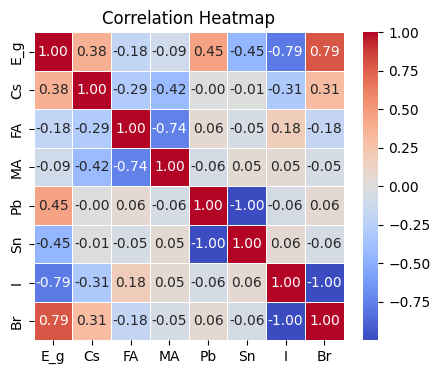

In [20]:
corr_matrix = results.corr()

# Step 4: Draw the heatmap
plt.figure(figsize=(5, 4))  # Optional: Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
# Normalize Ratio of Halides (C site ions)
normalized_ion_data = ion_data[a_site_valid & b_site_valid & c_site_valid]
total_c_coeff = normalized_ion_data["c"].sum(axis=1)
normalized_ion_data["c"] = normalized_ion_data["c"].div(total_c_coeff, axis=0)
normalized_ion_data.columns = normalized_ion_data.columns.get_level_values(1)
normalized_results = filtered_eg.join(normalized_ion_data)
normalized_results

C:\Users\Violet\AppData\Local\Temp\ipykernel_22064\2734913284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_ion_data["c"] = normalized_ion_data["c"].div(total_c_coeff, axis=0)


,E_g,Cs,FA,MA,Pb,Sn,I,Br
1,1.60,0.0,0.0,0.950,1.0,0.0,1.000000,0.000000
2,1.59,0.0,0.0,0.962,1.0,0.0,1.000000,0.000000
5,1.55,0.0,0.0,0.975,1.0,0.0,1.000000,0.000000
6,1.55,0.0,0.0,0.950,1.0,0.0,1.000000,0.000000
7,1.55,0.0,0.0,0.925,1.0,0.0,1.000000,0.000000
...,...,...,...,...,...,...,...,...
808,1.83,0.0,0.0,1.000,0.0,1.0,0.120000,0.880000
809,1.77,0.0,0.0,1.000,0.0,1.0,0.333333,0.666667
810,2.08,0.0,0.0,1.000,0.0,1.0,0.000000,1.000000
811,1.46,0.0,0.0,1.000,0.0,1.0,0.666667,0.333333


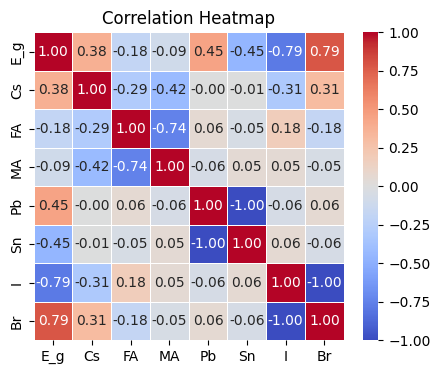

In [26]:
corr_matrix = normalized_results.corr()

# Step 4: Draw the heatmap
plt.figure(figsize=(5, 4))  # Optional: Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
result_dataset = BaseDataset(results)
result_dataset.save(
    path="../data/processed/element-composition_band-gap.parquet",
    overwrite=True
    )
result_dataset.metadata.model_dump()

{'creation_date': datetime.datetime(2025, 4, 3, 16, 55, 15, 326217),
 'data_hash': '23b4b71c2f0feb26e2029d5bb66f7c3f37f8dcce19a052bf6a4ea9e22a9d7cef',
 'source_path': WindowsPath('../data/processed/element-composition_band-gap_2.parquet'),
 'feature_count': 8,
 'sample_count': 634,
 'target_feature': '',
 'processing_history': [],
 'tags': []}

In [28]:
normalized_result_dataset = BaseDataset(normalized_results)
normalized_result_dataset.save(
    path="../data/processed/element-composition_band-gap_normalized.parquet",
    overwrite=True
    )
normalized_result_dataset.metadata.model_dump()

{'creation_date': datetime.datetime(2025, 4, 3, 16, 55, 17, 371409),
 'data_hash': '311e81c42a5686516fba8a177dea92ad90605b93a5e74830d1b7a2616ade2d8b',
 'source_path': WindowsPath('../data/processed/element-composition_band-gap_normalized.parquet'),
 'feature_count': 8,
 'sample_count': 634,
 'target_feature': '',
 'processing_history': [],
 'tags': []}